In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [35]:
data=pd.read_csv('Cleaned-Data/Cleaned-Data.csv')

In [36]:
data.head()

Fever  Tiredness  Dry-Cough  Difficulty-in-Breathing  Sore-Throat  \
0      1          1          1                        1            1   
1      1          1          1                        1            1   
2      1          1          1                        1            1   
3      1          1          1                        1            1   
4      1          1          1                        1            1   

   None_Sympton  Pains  Nasal-Congestion  Runny-Nose  Diarrhea  ...  \
0             0      1                 1           1         1  ...   
1             0      1                 1           1         1  ...   
2             0      1                 1           1         1  ...   
3             0      1                 1           1         1  ...   
4             0      1                 1           1         1  ...   

   Gender_Male  Gender_Transgender  Severity_Mild  Severity_Moderate  \
0            1                   0              1                  0   
1            1                   0              1                  0   
2            1                   0              1                  0   
3            1                   0              0                  1   
4            1                   0              0                  1   

   Severity_None  Severity_Severe  Contact_Dont-Know  Contact_No  Contact_Yes  \
0              0                0                  0           0            1   
1              0                0                  0           1            0   
2              0                0                  1           0            0   
3              0                0                  0           0            1   
4              0                0                  0           1            0   

   Country  
0    China  
1    China  
2    China  
3    China  
4    China  

[5 rows x 27 columns]

In [37]:
target=data[['Severity_Mild','Severity_Moderate','Severity_None','Severity_Severe']]
data['Target']=np.array(np.argmax(np.array(target),axis=1))
Target=data['Target']


In [40]:
features=data.drop(['Severity_Mild','Severity_Moderate','Severity_None','Severity_Severe'],axis=1)

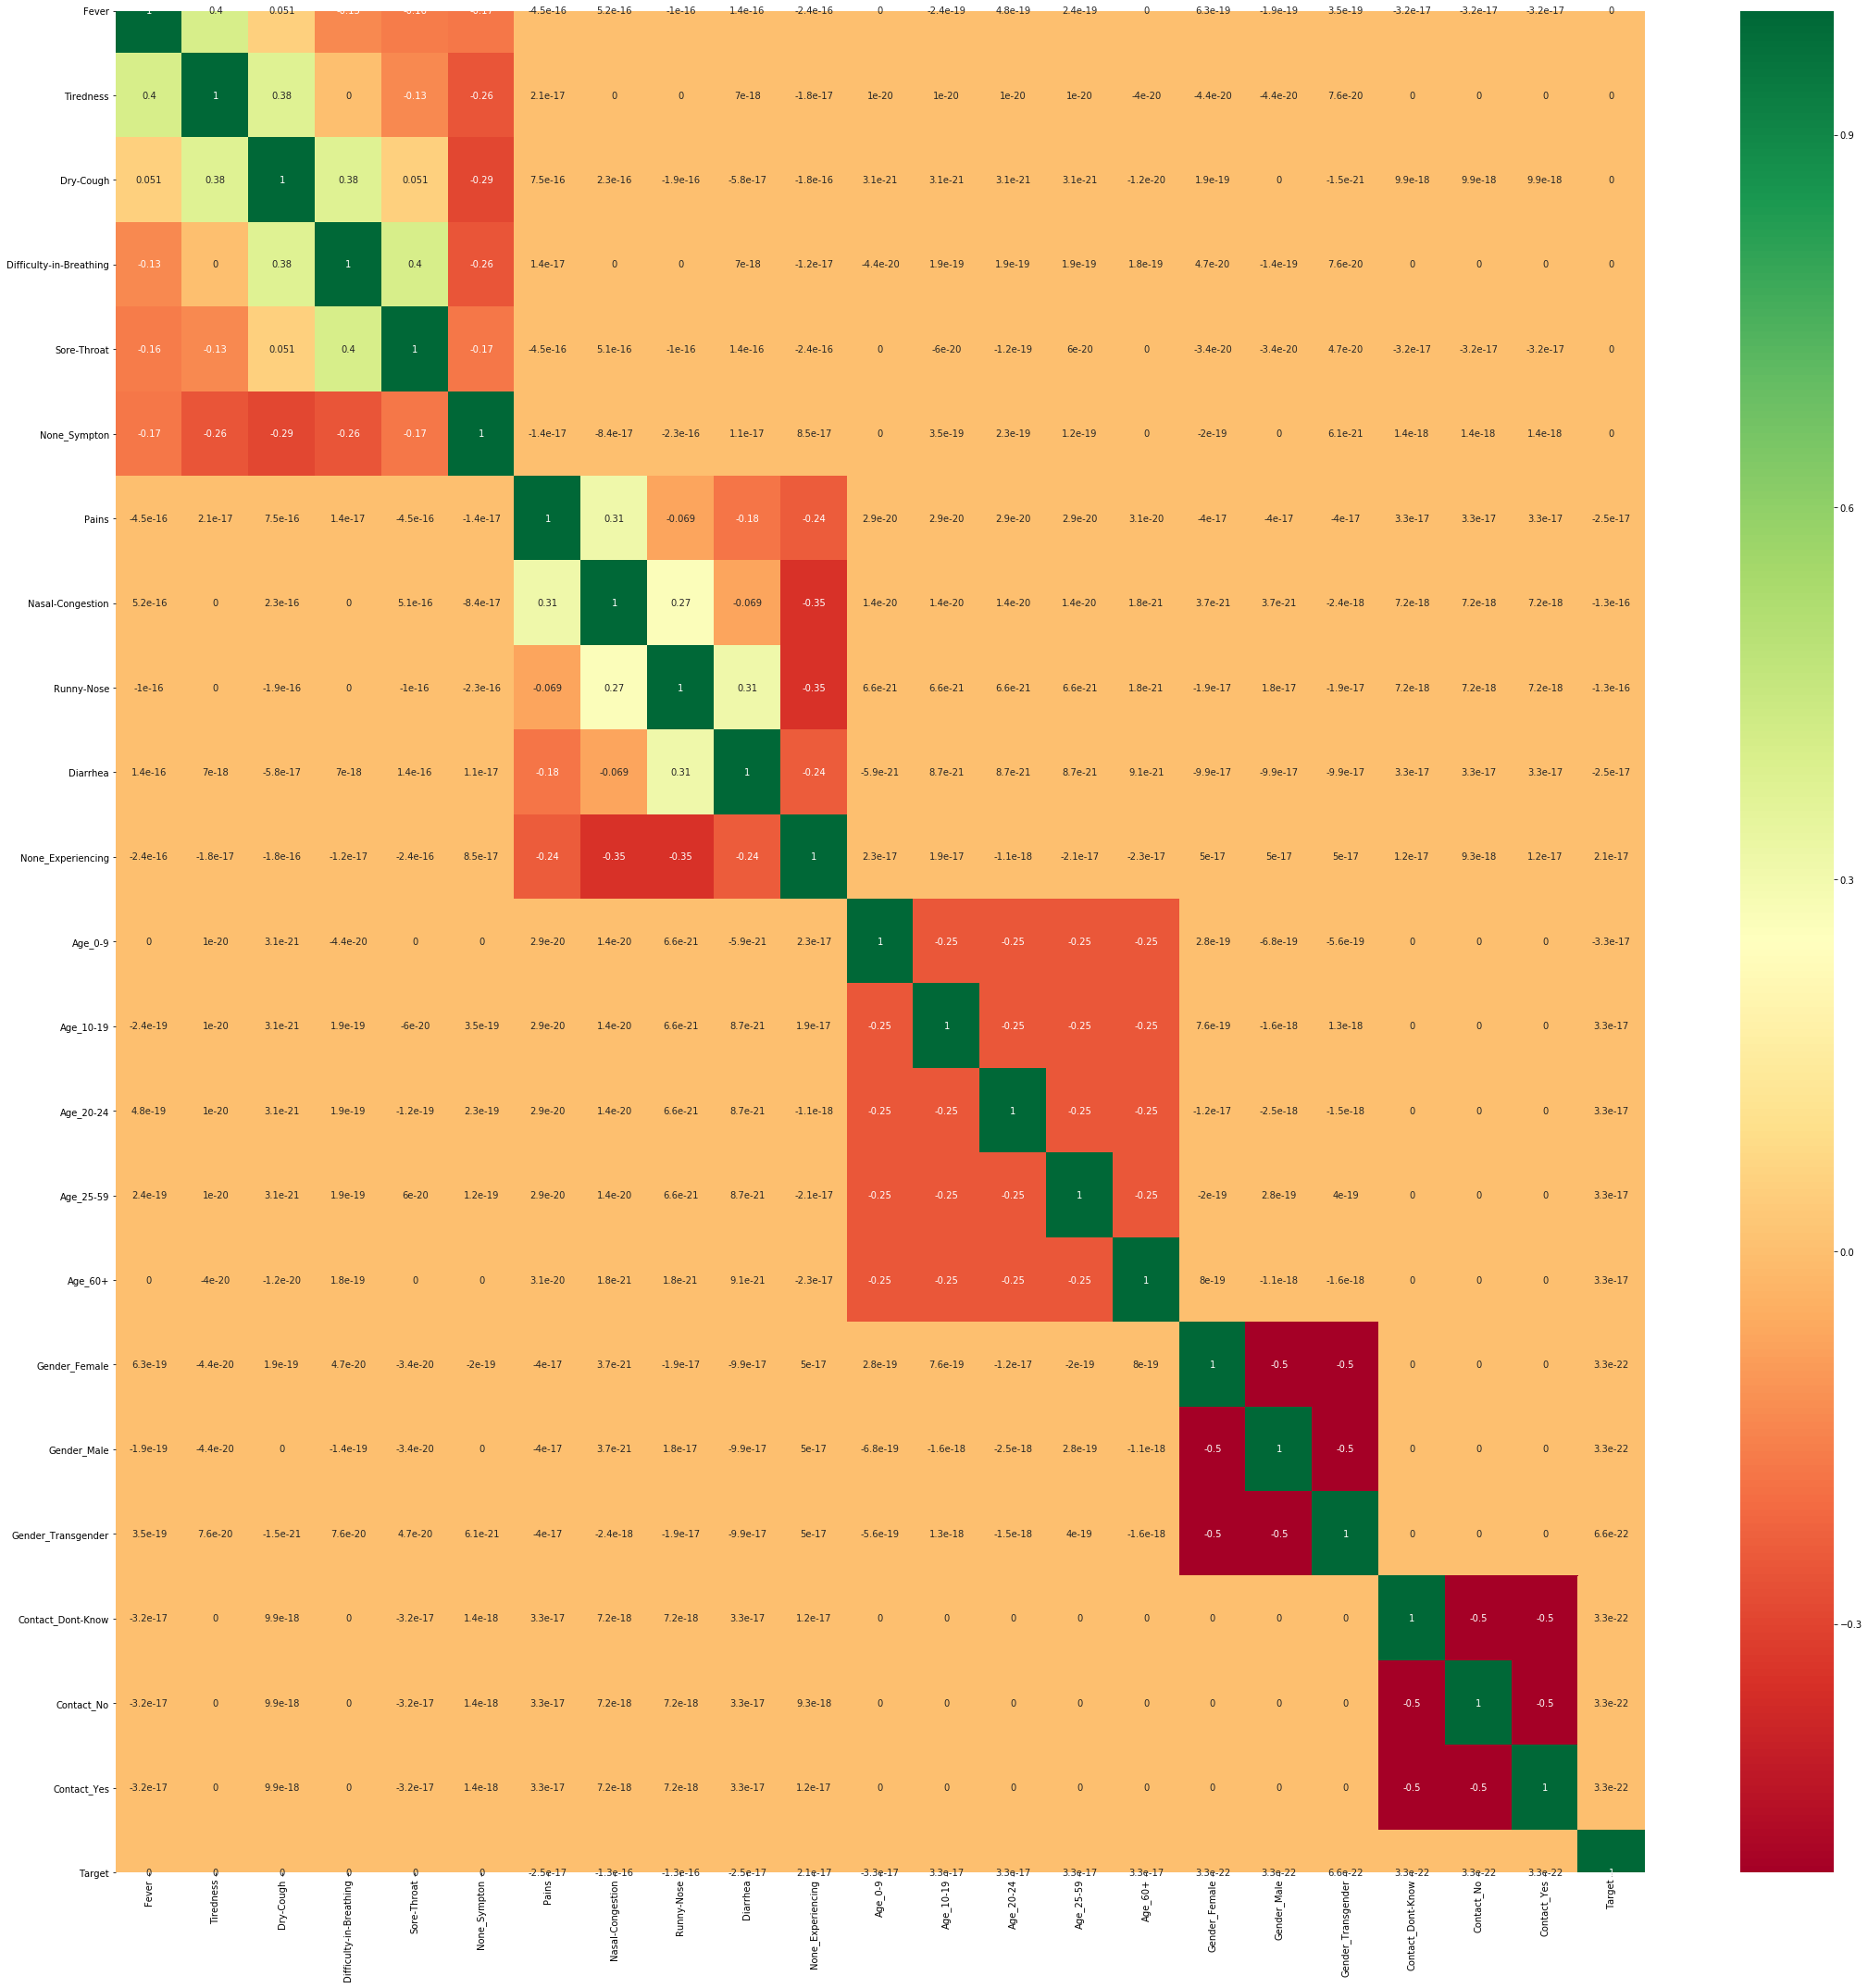

In [42]:
corrmat = features.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(37,37))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [23]:
X=features.drop(['Target','Country'],axis=1)
y=Target
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
#feat_importances.nlargest(10).plot(kind='barh')
#plt.show()

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]


C:\Users\nshaik\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:439: RuntimeWarning: invalid value encountered in true_divide
  return all_importances / np.sum(all_importances)


In [29]:
bestfeatures = SelectKBest(score_func=chi2, k=22)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features


                      Specs  Score
0                     Fever    0.0
1                 Tiredness    0.0
2                 Dry-Cough    0.0
3   Difficulty-in-Breathing    0.0
4               Sore-Throat    0.0
5              None_Sympton    0.0
6                     Pains    0.0
7          Nasal-Congestion    0.0
8                Runny-Nose    0.0
9                  Diarrhea    0.0
10        None_Experiencing    0.0
11                  Age_0-9    0.0
12                Age_10-19    0.0
13                Age_20-24    0.0
14                Age_25-59    0.0
15                  Age_60+    0.0
16            Gender_Female    0.0
17              Gender_Male    0.0
18       Gender_Transgender    0.0
19        Contact_Dont-Know    0.0
